# Simulación de funciones de transferencia de sistemas

El objetivo de este cuaderno es entender la simulacion de funciones de transferencia y el analisis de primer y segundo orden de sistemas dinamicos. 

## 1. Funciones de transferencia 

Para mirar la simulacion de una funcion de transferencia, partiremos de la ecuacion diferencial del sistema masa-resorte-amortiguador dada por
$$
m\frac{d^2x}{dt^2} + b\frac{dx}{dt} + kx = f(t).
$$

Aplicando la transformada de Laplace al sistema, se encuentra que la funcion de transferencia esta dada por
$$
H(s) = \frac{X(s)}{F(s)} = \frac{1}{ms^2 + bs + k}
$$

En este caso, para poder usar el metodo de funcion de transferencia, se necesita los coeficientes de numerado y el denominador.

In [2]:
import control as ct 
import matplotlib.pyplot as plt

# Parameters
m = 250.0           # system mass
k = 40.0            # spring constant
b = 60.0            # damping constant

# System
num = [1]
den = [m, b, k]
sys = ct.tf(num, den)
sys


TransferFunction(array([1]), array([250.,  60.,  40.]))

Ahora encontrando de nuevo la respuesta en el tiempo del sistema

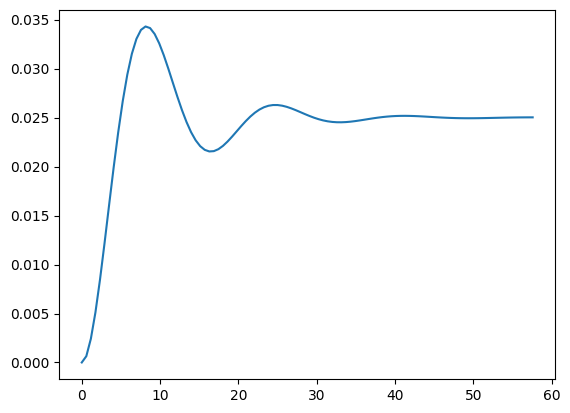

In [3]:
# Step response for the system
plt.figure(1)
t, y = ct.step_response(sys)
plt.plot(t, y)
plt.show(block=False)

## 2. Sistemas de primer orden

A continuacion estudiaremos el comportamiento en el tiempo de los sistemas de primer orden. Recordar que los sistemas de primer orden estan representados como
$$
H(s) = \frac{X(s)}{U(s)} = \frac{K}{\tau s + 1},
$$
donde $K$ es la ganancia del sistema y $\tau$ es la constante del tiempo

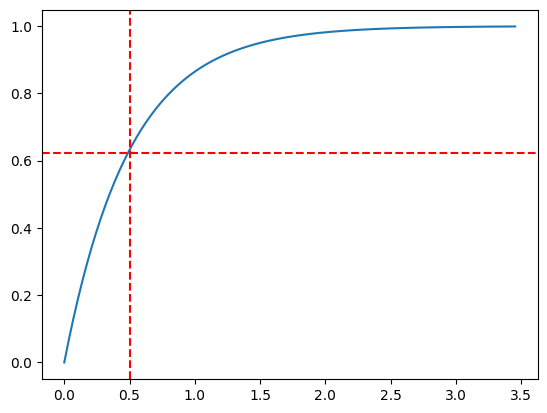

In [7]:
import numpy as np

# Simulation first-order system
K = 1.0             # system gain
tau = 0.5           # time constant

# System
num = [K]
den = [tau, 1]

sys = ct.tf(num, den)

# Step response for the system
plt.figure(2)
t, y = ct.step_response(sys)
plt.plot(t, y)

# Annotate the point
# Mark the point at t=0.5
t_mark = 0.5
y_mark = y[np.abs(t - t_mark).argmin()]

# Add vertical and horizontal lines at the marked point
plt.axvline(x=t_mark, color='r', linestyle='--')
plt.axhline(y=y_mark, color='r', linestyle='--')

plt.show(block=False)

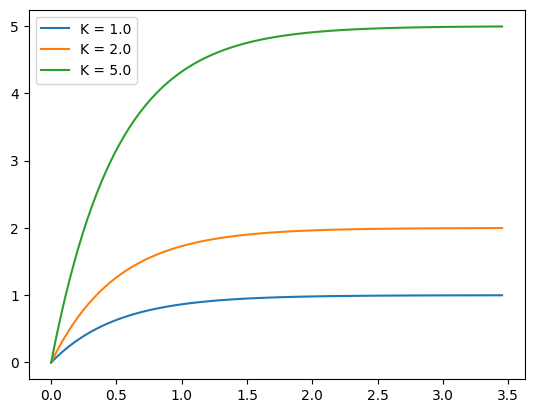

In [8]:
# Lets compare different gain in the plot
K_values = [1.0, 2.0, 5.0]
tau = 0.5

# Figure
plt.figure(3)

for K in K_values:
    # System
    num = [K]
    den = [tau, 1]
    sys = ct.tf(num, den)

    # Step response for the system
    t, y = ct.step_response(sys)
    plt.plot(t, y, label=f'K = {K}')

plt.legend()
plt.show(block=False)


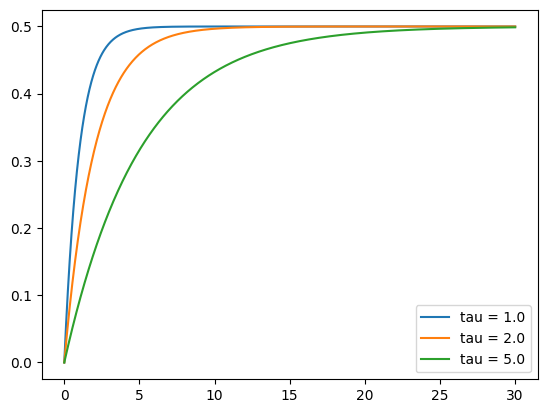

In [10]:
# Lets compare different tau in the plot
tau_values = [1.0, 2.0, 5.0]
K = 0.5

# Creating time and input vector
t = np.linspace(0, 30, 1000)
u = np.ones_like(t)


# Figure
plt.figure(3)

for tau in tau_values:
    # System
    num = [K]
    den = [tau, 1]
    sys = ct.tf(num, den)

    # Step response for the system
    t, y = ct.forced_response(sys, t, u)
    plt.plot(t, y, label=f'tau = {tau}')

plt.legend()
plt.show(block=False)

## 2. Sistemas de segundo orden

Por el lado de los sistemas de segundo orden, la funcion de transferencia esta dada por
$$
H(s) = \frac{k \omega_n^2}{s^2 + 2 \zeta \omega_n + \omega_n^2}
$$

In [25]:
# Parameters
k = 2.0
omega = 3.9
zeta = 0.4

# System
num = [k*omega**2]
den = [1, 2*zeta*omega, omega**2]

sys = ct.tf(num, den)
sys

TransferFunction(array([30.42]), array([ 1.  ,  3.12, 15.21]))

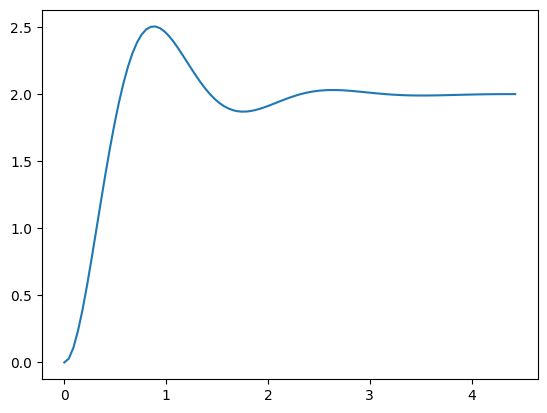

In [26]:
# Plot 
plt.figure(4)
t, y = ct.step_response(sys)
plt.plot(t, y)
plt.show(block=False)


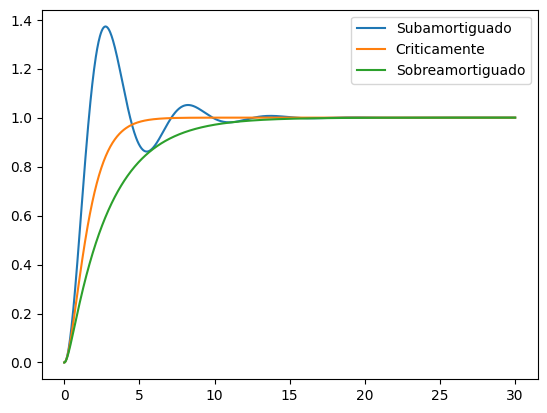

In [29]:
# Lets compare different values of zeeta
zeta_values = [0.3, 1.0, 1.8]
k = 1
omega = 1.2

# Creating time and input vector
t = np.linspace(0, 30, 1000)
u = np.ones_like(t)


# Figure
plt.figure(3)

for zeta in zeta_values:
    # System
    num = [k*omega**2]
    den = [1, 2*zeta*omega, omega**2]
    sys = ct.tf(num, den)

    # Step response for the system
    t, y = ct.forced_response(sys, t, u)
    plt.plot(t, y, label=f'tau = {tau}')

plt.legend(['Subamortiguado','Criticamente','Sobreamortiguado'])

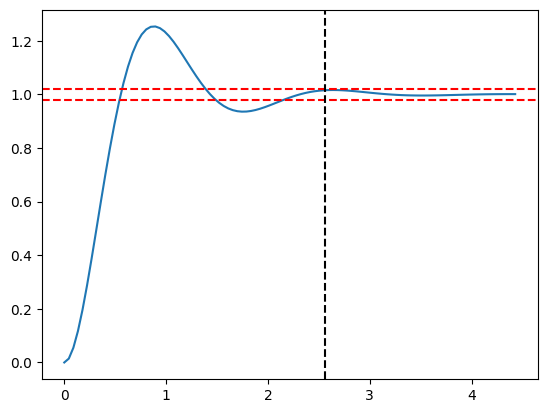

In [34]:
# Parameters
k = 1.0
omega = 3.9
zeta = 0.4

# System
num = [k*omega**2]
den = [1, 2*zeta*omega, omega**2]
sys = ct.tf(num, den)

# Miremos las bandas de los tiempos de estabilizacion
criterio_2p = 4/(zeta*omega)

# Valor final 1
y_max = 1.02
y_min = 0.98

# Plot
plt.figure(5)
t, y = ct.step_response(sys)
plt.plot(t, y)
plt.axhline(y=y_max, color='r', linestyle='--')
plt.axhline(y=y_min, color='r', linestyle='--')
plt.axvline(x=criterio_2p, color='k', linestyle='--')